Lecture week 1
==============

If this is the first time you are using jupyterlab, you may want to check out this [short introduction to jupyterlab](https://janboone.github.io/applied-economics/pagescreencasts.html#Short_introduction_to_JupyterLab)

This is the notebook we discussed in the lectures of the first week. Do not just simply run through the cells below, but change things, play around with the code, try other things etc.

You do not learn a lot from pressing SHIFT-ENTER through an existing notebook.


## Import libraries



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

/opt/conda/lib/python3.8/site-packages/theano/configdefaults.py:696: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn(
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Generating random variables



There are different ways to generate random variables. You do not need to know them all. Just use the ones you are happy with. Experiment a bit with all of them, jus to get an idea of how they work.



### tensorflow



In [10]:
tf.random.uniform([10,4],0,1)

<tf.Tensor: shape=(10, 4), dtype=float32, numpy=
array([[0.3360592 , 0.2341249 , 0.5925926 , 0.9295021 ],
       [0.4090222 , 0.5351814 , 0.06339276, 0.86464   ],
       [0.9885632 , 0.06894541, 0.8008833 , 0.2784251 ],
       [0.61640203, 0.5133958 , 0.78173757, 0.5236528 ],
       [0.40527165, 0.00747669, 0.4569515 , 0.26440823],
       [0.77686155, 0.4520445 , 0.6392257 , 0.47018778],
       [0.0888319 , 0.01547754, 0.96021974, 0.23377371],
       [0.73604524, 0.06117189, 0.25479734, 0.0297718 ],
       [0.05658066, 0.49421847, 0.3242886 , 0.8279139 ],
       [0.68359625, 0.87019026, 0.0644027 , 0.52644646]], dtype=float32)>

As you can see, a tensorflow array has some extra information in the first line. Some packages cannot deal with this. If you get an error using a tensorflow array, it can help to apply the `numpy()` method.



In [11]:
tf.random.uniform([10,4],0,1).numpy()

array([[0.5517137 , 0.5703113 , 0.5630356 , 0.91385496],
       [0.7488214 , 0.8225161 , 0.06262028, 0.4802245 ],
       [0.61337626, 0.45384645, 0.4919963 , 0.50688505],
       [0.40251315, 0.6855378 , 0.65492284, 0.42955017],
       [0.81379974, 0.46474707, 0.54499674, 0.82734156],
       [0.5848986 , 0.6831137 , 0.40183747, 0.20451593],
       [0.42521656, 0.18525386, 0.30172956, 0.7900913 ],
       [0.54735196, 0.7860143 , 0.99976087, 0.5216851 ],
       [0.65262425, 0.5996126 , 0.6804341 , 0.6587579 ],
       [0.21769011, 0.73447526, 0.7940258 , 0.76983595]], dtype=float32)

### pymc3



We can also generate random numbers with pymc3:



In [15]:
pm.Uniform.dist(0,1).random(size=(10,3))

array([[0.95575746, 0.8419309 , 0.58283535],
       [0.39316293, 0.47041616, 0.22194611],
       [0.00329527, 0.84194071, 0.22210243],
       [0.52044544, 0.61769139, 0.86409614],
       [0.79507533, 0.1500418 , 0.56595232],
       [0.58434859, 0.84731028, 0.06195188],
       [0.05587542, 0.28879255, 0.23523001],
       [0.69168561, 0.78851596, 0.83582926],
       [0.83505278, 0.63052097, 0.88026548],
       [0.00313238, 0.33612003, 0.40470564]])

### numpy



Good old numpy also has a random library:



In [14]:
np.random.uniform(0,1,size=(10,3))

array([[0.77749346, 0.45322135, 0.41784374],
       [0.64369077, 0.22502533, 0.50370495],
       [0.62377327, 0.43658175, 0.45303219],
       [0.28589816, 0.1787601 , 0.58658976],
       [0.84308612, 0.3461543 , 0.15946842],
       [0.97019336, 0.39416118, 0.59030178],
       [0.72673118, 0.90867822, 0.77665982],
       [0.56844464, 0.78363209, 0.67299367],
       [0.83788014, 0.24489646, 0.30319066],
       [0.5119626 , 0.43148791, 0.94832413]])

### random vectors that are related



You can build a set of vectors that are related to each other. The next example has `x` and `y` variables that are correlated:



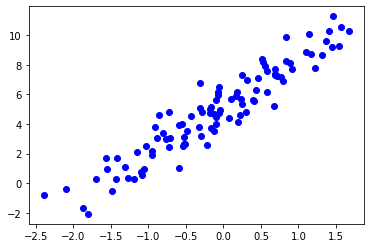

In [22]:
N = 100
x = np.random.normal(0,1,size=(N,1))
y = 3 * x + 5 + np.random.normal(0,1,size=(N,1))
plt.plot(x,y,'bo');

If variables are related, we can figure out what the correlation is, using OLS. Here we use `statsmodels` for the OLS regression:



the fitted constant is 5.21 and the fitted slope equals 3.12


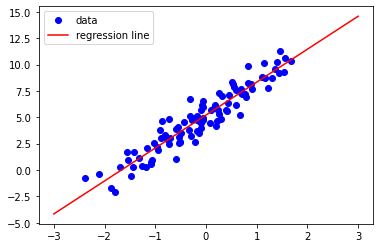

In [25]:
model = sm.OLS(y,sm.add_constant(x))
print("the fitted constant is {:.2f} and the fitted slope equals {:.2f}".format(*model.fit().params))
b, a = model.fit().params
plt.plot(x,y,'bo',label='data')
range_x = np.linspace(-3,3)
plt.plot(range_x,b + a * range_x,'r',label='regression line')
plt.legend();

We can present the estimated parameters in 2 different ways:



In [26]:
print("{:.2f}, {:.2f}".format(*model.fit().params))
print("{}".format(model.fit().params))

5.21, 3.12
[5.20725954 3.12353854]


## distribution of slopes



If we generate data and run the regression `n` times, we get a distribution of slopes.

We use yet another way to generate our data. Don&rsquo;t worry about the exact syntax, we will see `pm.Model()` a lot lateron in the course.



In [27]:
def generate_data(a=0.5,b=0,n=20):
    with pm.Model() as model_data:
        x = pm.Normal("x",0,2)
        mu_y = a*x+b
        y = pm.Normal("y",mu_y,2)
        data = pm.sample_prior_predictive(samples=n)
    return data
data = generate_data()
data['x']

array([-2.05390064, -0.3438997 , -0.51664525,  3.64227672,  3.46304029,
        2.40037883, -2.2921418 , -0.6636318 ,  0.72507741,  1.75889062,
       -2.4989709 ,  0.05779167, -2.42187364, -3.22225598,  1.45636623,
       -0.93023766, -0.56902478,  3.48718524,  2.28140502, -0.99854943])

As a brief reminder, the following is a dictionary in python:

In [32]:
my_dict = {'x': 10, 'y':20}
my_dict['x']

10

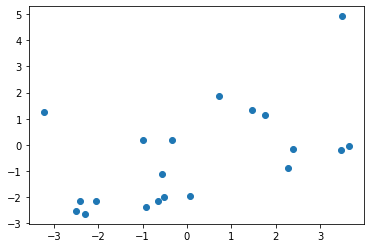

In [31]:
plt.scatter(data['x'],data['y']);

In [33]:
slopes = []
for i in np.arange(100):
    data = generate_data()
    slopes.append(sm.OLS(data['y'],sm.add_constant(data['x'])).fit().params[1])
    


make a histogram of the slopes:

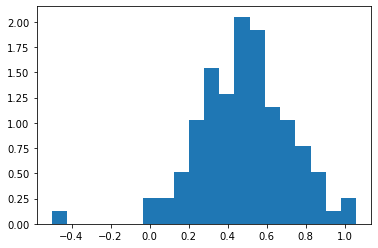

In [35]:
plt.hist(slopes,bins=20,density=True);

Now we generate the data where `a` is set equal to 0

In [36]:
slopes = []
for i in np.arange(100):
    data = generate_data(a=0)
    slopes.append(sm.OLS(data['y'],sm.add_constant(data['x'])).fit().params[1])
    


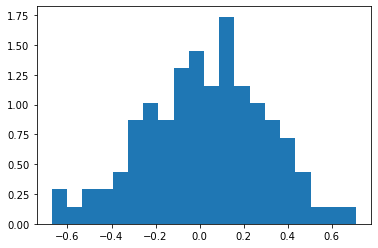

In [38]:
plt.hist(slopes,bins=20,density=True);

What does the following cell tell us?



In [39]:
np.sum(np.array(slopes)>0.5)/len(slopes)

0.03

## Do our own OLS



Instead of relying on existing packages to do OLS, let&rsquo;s do it ourselves! OLS minimizes the squared (vertical) distance between obervations and the line we estimate: `y = w[0] + w[1] * x`



In [43]:
data = generate_data(a=1,b=5)
def loss(w):
    loss = np.sum((w[0]+w[1]*data['x']-data['y'])**2)/len(data['y'])
    return loss

In [44]:
loss([1,9])

278.0168727540582

In [45]:
optimize.fmin(loss,[0,0])

Optimization terminated successfully.
         Current function value: 5.801362
         Iterations: 56
         Function evaluations: 105


array([5.27933682, 0.99242052])